## Data Analysis And Machine Learning on [Campus Placement Data](https://www.kaggle.com/benroshan/factors-affecting-campus-placement)

- **Explatory Data Analysis**
- **Determining features affecting placement and salary**
- **Prediction of wheather student gets placed or not (Binary Classification)**
- **Predition of Salary secured by a student (Regression)**

### Library Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [2]:
data = pd.read_csv("datasets_596958_1073629_Placement_Data_Full_Class.csv")

In [3]:
data.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
data.drop("sl_no", axis=1, inplace=True)

## Exploratory Data Analysis

### Common Questions
* **Does GPA affect placement?**
* **Does Higher Secondary School's Percentage still affect campus placement?**
* **Is work experience required for securing good job?**
* **What factor affect the salary?**

**Let's find out**

### Pandas Profiler's Interactive Report  

In [5]:
data.profile_report(title='Campus Placement Data - Report', progress_bar=False)




* 67 Missing values in Salary for students who didn't get placed. **NaN Value needs to be filled**.

* **Data is not scaled**. Salary column ranges from 200k-940k, rest of numerical columns are percentages.

* 300k at 75th Percentile goes all the way up to 940k max, in Salary (high skewnwss). Thus, **outliers at high salary end**.

## Exploring Data by each Feature

### Feature: Gender
#### Does gender affect placements?

In [6]:
data.gender.value_counts()
# Almost double

M    139
F     76
Name: gender, dtype: int64

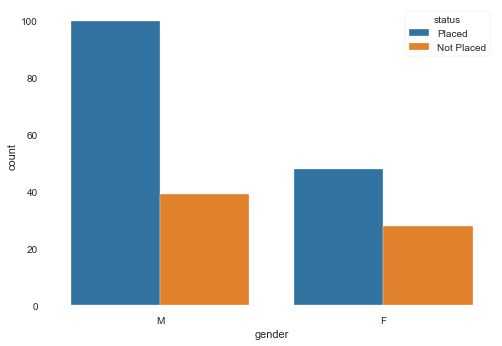

In [7]:
sns.countplot("gender", hue="status", data=data)
plt.show()

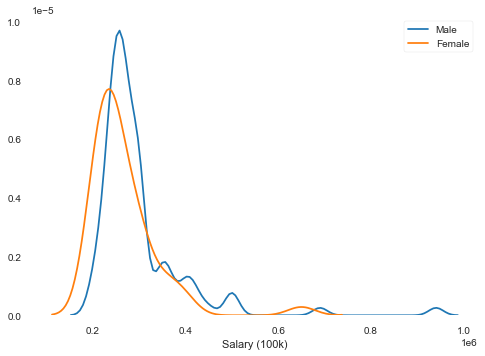

In [8]:
#This plot ignores NaN values for salary, ignoring students who are not placed
sns.kdeplot(data.salary[ data.gender=="M"])
sns.kdeplot(data.salary[ data.gender=="F"])
plt.legend(["Male", "Female"])
plt.xlabel("Salary (100k)")
plt.show()

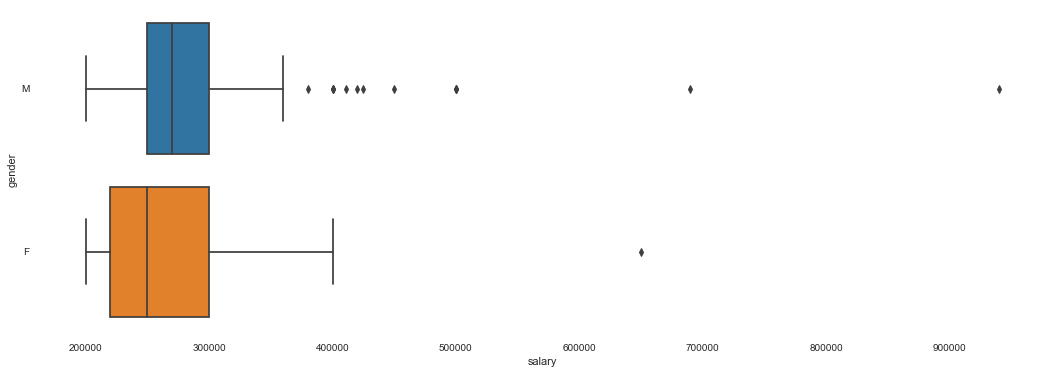

In [9]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "gender", data=data)
plt.show()

#### Insights

* We have samples of 139 Male studets and 76 Female students.
* 30 Female and 40 Male students are not placed. Male students have comparatively higher placemets. 
* More outliers on Male -> Male students are getting high CTC jobs.
* Male students are offered slightly greater salary than female on an average. 


### Feature: ssc_p (Secondary Education percentage), ssc_b (Board Of Education)
#### Does Secondary Education affect placements?

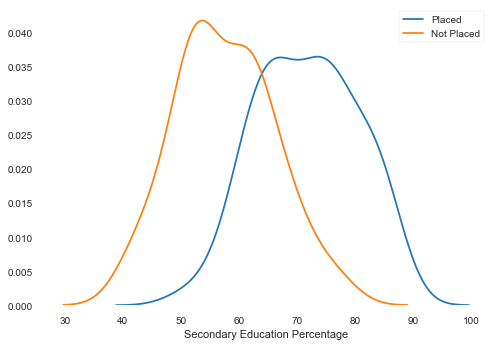

In [10]:
#Kernel-Density Plot
sns.kdeplot(data.ssc_p[ data.status=="Placed"])
sns.kdeplot(data.ssc_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Secondary Education Percentage")
plt.show()

* All students with Secondary Education Percentage above 90% are placed
* All students with Secondary Education Percentage below 50% are not-placed
* **Students with good Secondary Education Percentage are placed on average.**

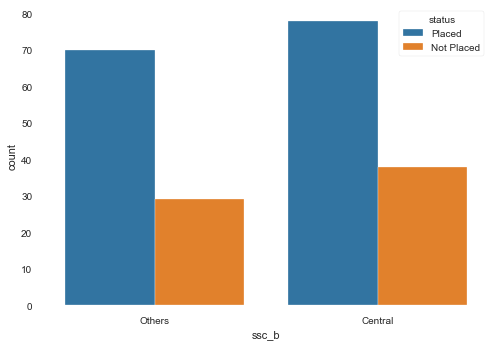

In [11]:
sns.countplot("ssc_b", hue="status", data=data)
plt.show()

* Board Of Education does not affect Placement Status much

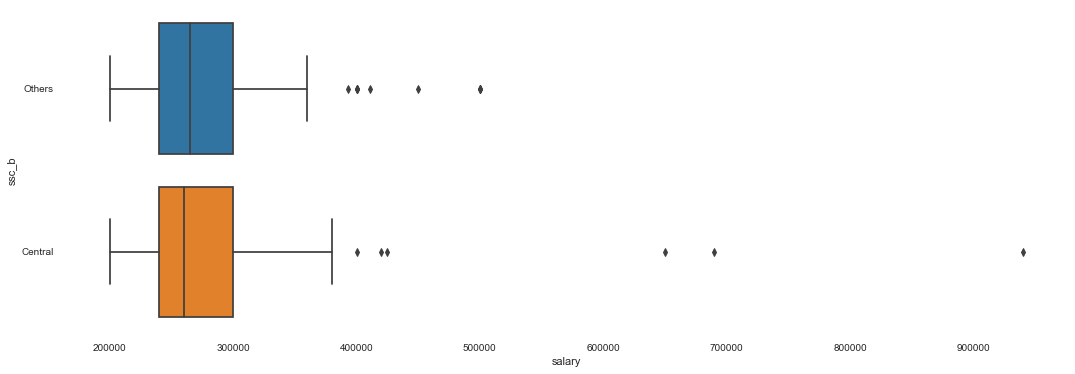

In [12]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "ssc_b", data=data)
plt.show()

* Outliers on both, but students from Central Board are getting the highly paid jobs.

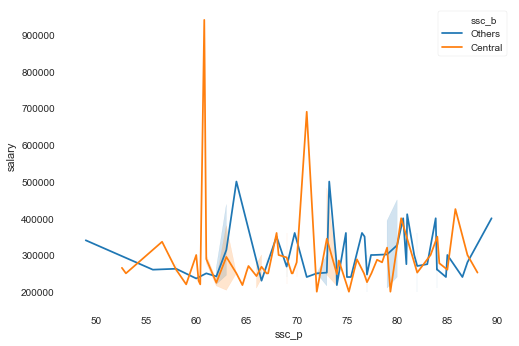

In [13]:
sns.lineplot("ssc_p", "salary", hue="ssc_b", data=data)
plt.show()

* No specific pattern (correlation) between Secondary Education Percentage and Salary.
* Board of Education is Not Affecting Salary

### Feature: hsc_p (Higher Secondary Education percentage), hsc_b (Board Of Education), hsc_s (Specialization in Higher Secondary Education)
#### Does Higher Secondary School affect Placements?

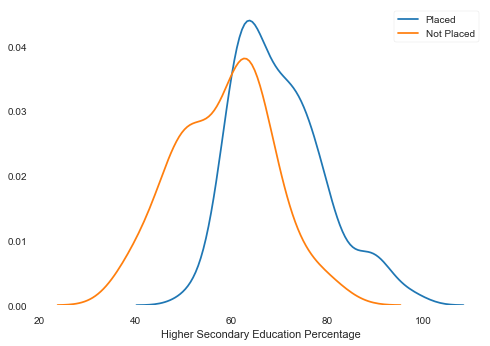

In [14]:
#Kernel-Density Plot
sns.kdeplot(data.hsc_p[ data.status=="Placed"])
sns.kdeplot(data.hsc_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Higher Secondary Education Percentage")
plt.show()

* Overlap here too. More placements for percentage above 65%
* Straight drop below 60 in placements -> Percentage must be atleast 60 for chance of being placed

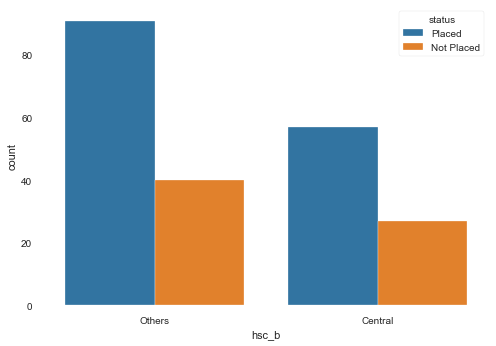

In [15]:
sns.countplot("hsc_b", hue="status", data=data)
plt.show()

Education Board again, doesn't affect placement status much

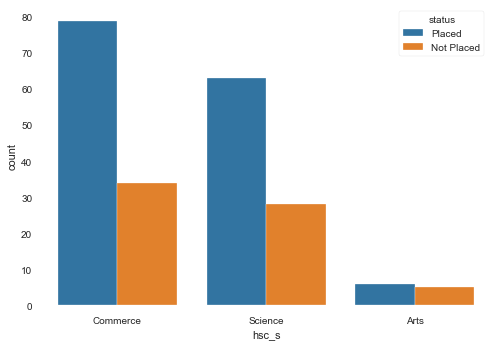

In [16]:
sns.countplot("hsc_s", hue="status", data=data)
plt.show()

* We have very less students with Arts specialization.
* Around 2:1 placed:unplaced  ratio for both Science and Commerse students


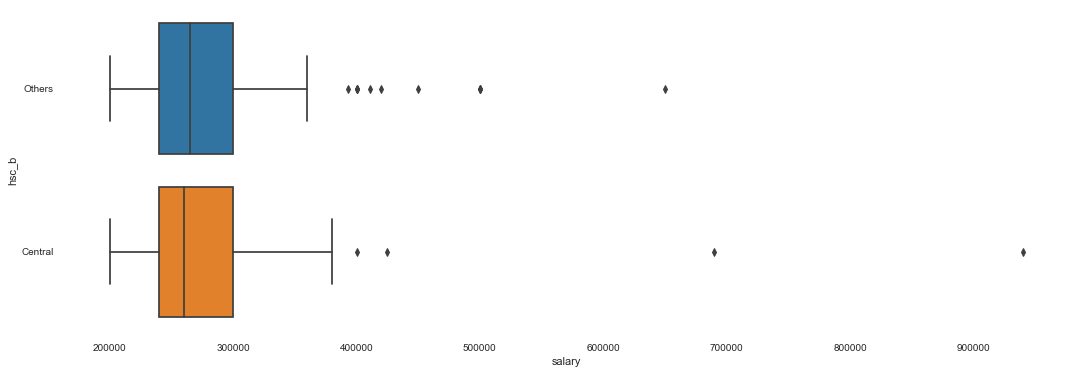

In [17]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "hsc_b", data=data)
plt.show()

* Outliers on both, board doesn't affect getting highly paid jobs. Highest paid job was obtailed by student from Central Board though.

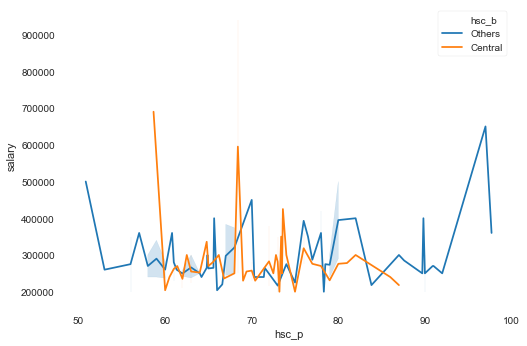

In [18]:
sns.lineplot("hsc_p", "salary", hue="hsc_b", data=data)
plt.show()

* High salary from both Central and Other. 
* High salary for both high and low percentage.
* Thus, both these feature doesnot affect salary.

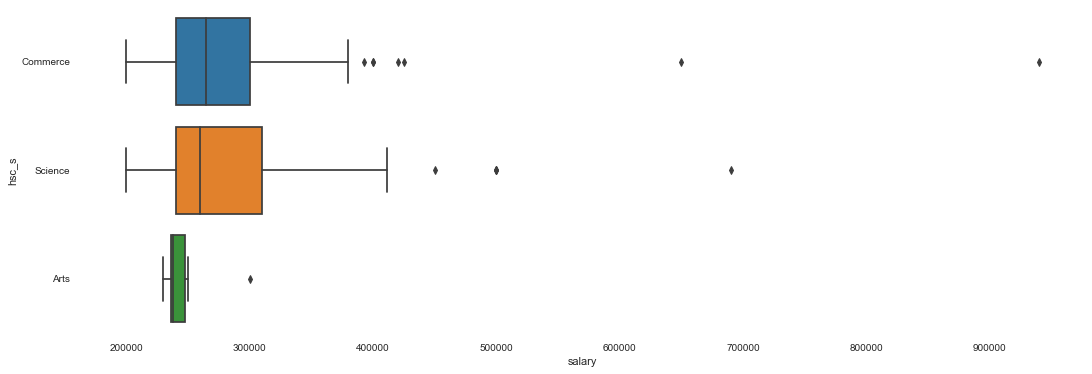

In [19]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "hsc_s", data=data)
plt.show()

* We can't really say for sure due to only few samples of students with Arts Major, but they aren't getting good salaries.

* Commerse students have slightly better placement status.

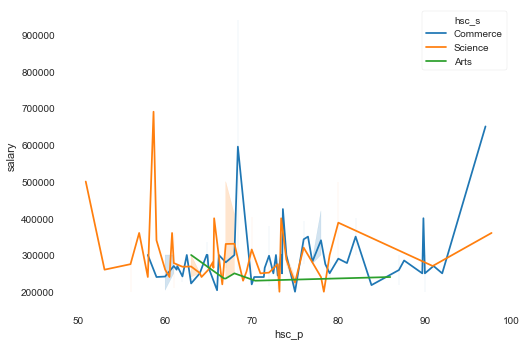

In [20]:
sns.lineplot("hsc_p", "salary", hue="hsc_s", data=data)
plt.show()

* **Student with Art Specialization surprisingly have comparatively low salary**

### Feature: degree_p (Degree Percentage), degree_t (Under Graduation Degree Field)
#### Does Under Graduate affect placements? 

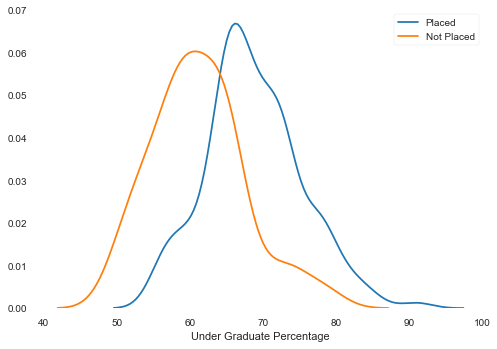

In [21]:
#Kernel-Density Plot
sns.kdeplot(data.degree_p[ data.status=="Placed"])
sns.kdeplot(data.degree_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Under Graduate Percentage")
plt.show()

* Overlap here too. But More placements for percentage above 65.
* UG Percentage least 50% to get placement

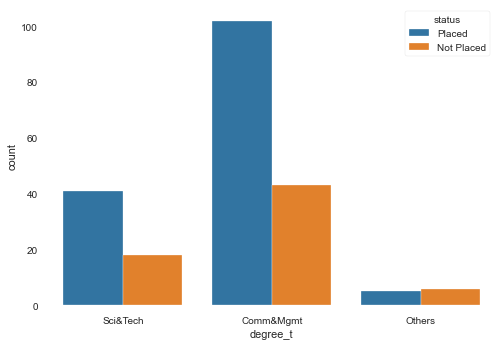

In [22]:
sns.countplot("degree_t", hue="status", data=data)
plt.show()

* We have very less students with "Other". We cant make decision from few cases.
* Around 2:1 placed:unplaced  ratio for both Science and Commerse students

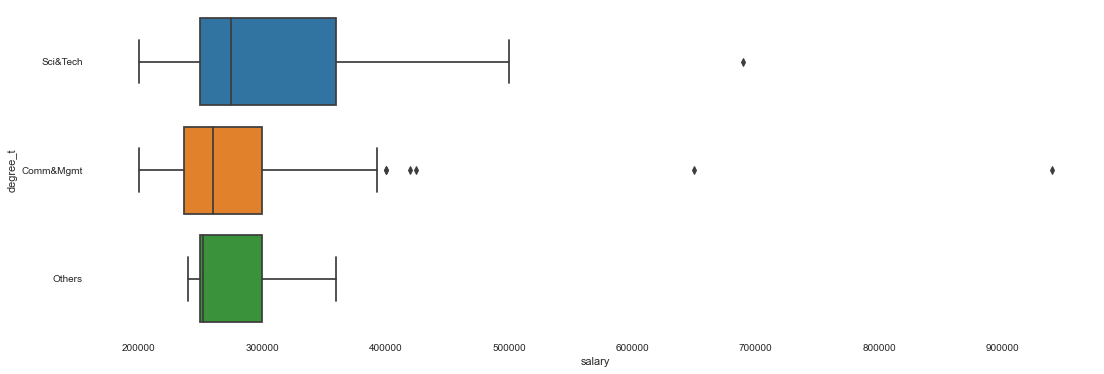

In [23]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "degree_t", data=data)
plt.show()

* Science&Tech students getting more salary on average
* Management stidents are getting more highly paid dream jobs. 

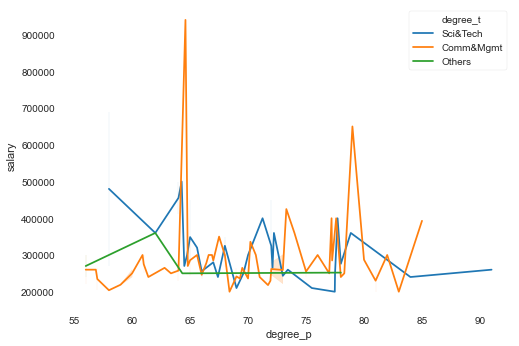

In [24]:
sns.lineplot("degree_p", "salary", hue="degree_t", data=data)
plt.show()

* Percentage does not seem to affect salary.
* Commerce&Mgmt students occasionally get dream placements with high salary

### Feature: workex (Work Experience)
#### Does Work Experience affect placements?

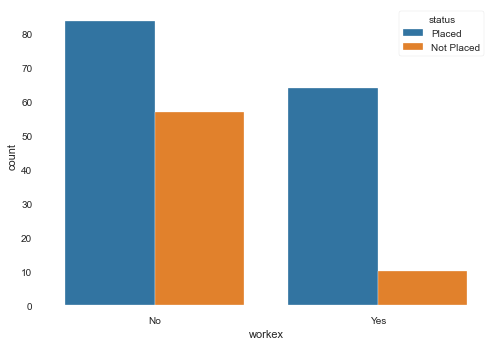

In [25]:
sns.countplot("workex", hue="status", data=data)
plt.show()

* **This affects Placement.** Very few students with work experience not getting placed!

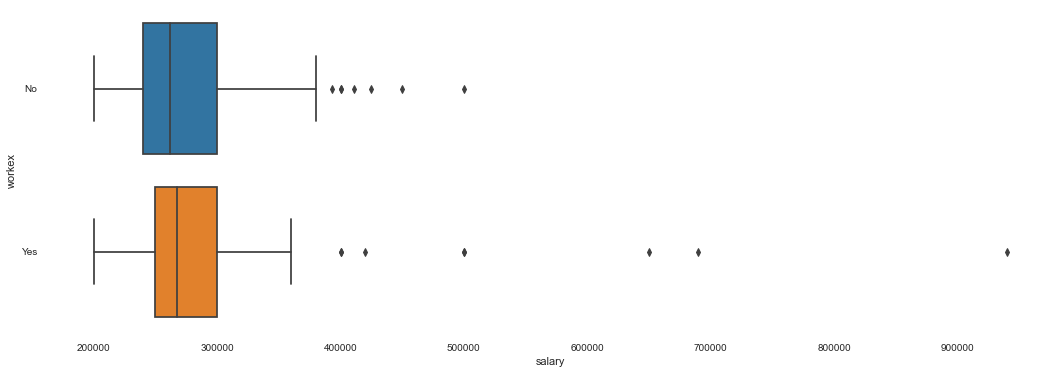

In [26]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "workex", data=data)
plt.show()

* Outliers (High salary than average) on both end but **students with experience getting dream jobs**
* Average salary as well as base salary high for students with work experience.

### Feature: etest_p  (Employability test percentage)

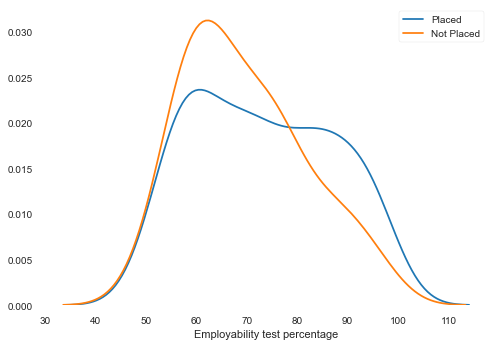

In [27]:
#Kernel-Density Plot
sns.kdeplot(data.etest_p[ data.status=="Placed"])
sns.kdeplot(data.etest_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Employability test percentage")
plt.show()

* High overlap -> It does not affect placement status much
* More "Not Placed" on percentage 50-70 range and more placed on 80% percentage range

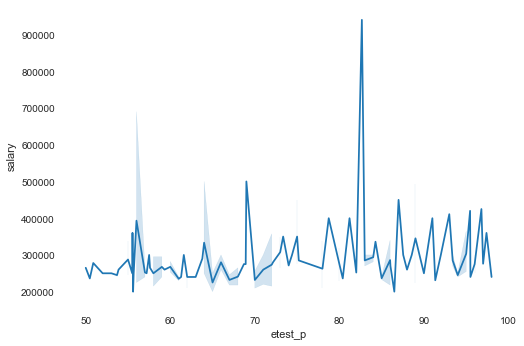

In [28]:
sns.lineplot("etest_p", "salary", data=data)
plt.show()

**This feature surprisingly does not affect placements and salary much**

### Feature: specialisation (Post Graduate Specialization)

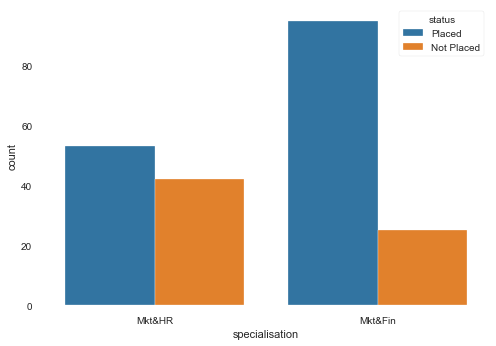

In [29]:
sns.countplot("specialisation", hue="status", data=data)
plt.show()

* This feature affects Placement status.
* Comparitively very low not-placed students in Mkt&Fin Section

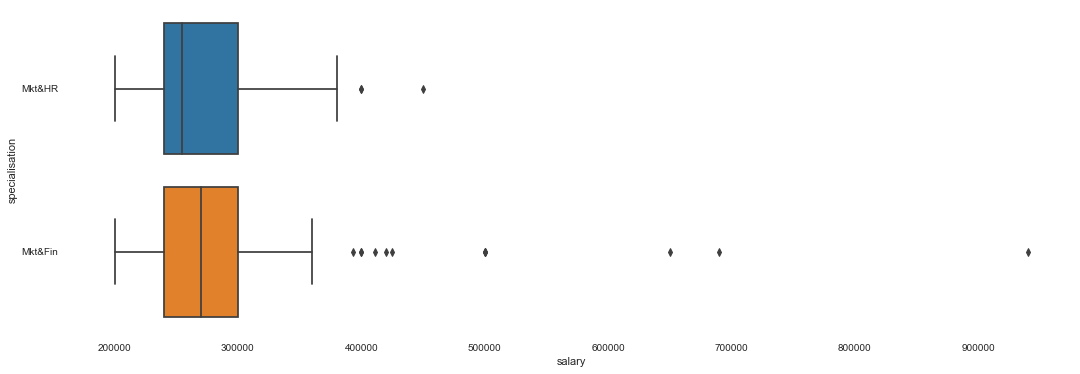

In [30]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "specialisation", data=data)
plt.show()

* **More Highly Paid Jobs for Mkt&Fin students**
* Mean salary is higher for marketing & finance students.

### Feature: mba_p (MBA percentage)
#### Does MBA Percentage affect placements?

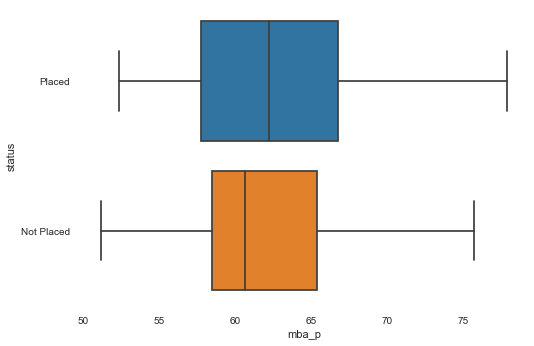

In [31]:
sns.boxplot("mba_p","status", data=data)
plt.show()

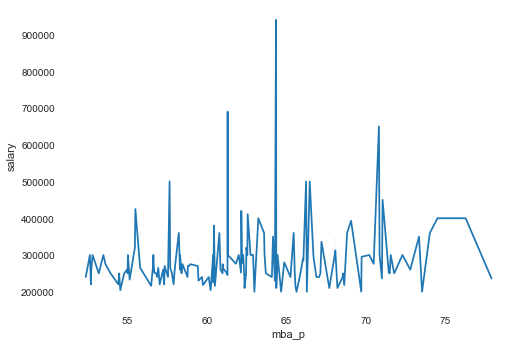

In [32]:
sns.lineplot("mba_p", "salary", data=data)
plt.show()

MBA Percentage also deos not affect salary much

# Feature Selection

Using Only following features (Ignoring Board of Education -> they didnt seem to have much effect)
* Gender
* Secondary Education percentage
* Higher Secondary Education Percentsge
* Specialization in Higher Secondary Education
* Under Graduate Dergree Percentage
* Under Graduation Degree Field
* Work Experience
* Employability test percentage
* Specialization
* MBA Percentage


In [4]:
data.drop(['ssc_b','hsc_b'], axis=1, inplace=True)

# Problem Statement

* Predicting If Students gets placed or not (Binary Classification Problem)
* Predicting Salary of Student (Regression Problem)

In [5]:
#Lets make a copy of data, before we proceeed with specific problems
data_clf = data.copy()
data_reg = data.copy()

## Binary Classification Problem

### Decision Tree Based Models

**Using Decision Tree based Algorithm does not  require feature scaling, and works great also in presence of categorical columns without ONE_HOT Encoding**

In [35]:
data_clf["gender"] = data_clf.gender.map({"M":0,"F":1})
data_clf["hsc_s"] = data_clf.hsc_s.map({"Commerce":0,"Science":1,"Arts":2})
data_clf["degree_t"] = data_clf.degree_t.map({"Comm&Mgmt":0,"Sci&Tech":1, "Others":2})
data_clf["workex"] = data_clf.workex.map({"No":0, "Yes":1})
data_clf["status"] = data_clf.status.map({"Not Placed":0, "Placed":1})
data_clf["specialisation"] = data_clf.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

In [17]:
# Library imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

### Dropping Salary Feature

Filling 0s for salary of students who didn't get placements would be bad idea as it would mean student gets placement if he earns salary.

In [66]:
# Seperating Features and Target
X = data_clf[['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p',]]
y = data_clf['status']
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [67]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [68]:
accuracy_score(y_test, y_pred)

0.8461538461538461

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        22
           1       0.88      0.88      0.88        43

    accuracy                           0.85        65
   macro avg       0.83      0.83      0.83        65
weighted avg       0.85      0.85      0.85        65



In [70]:
#Using Random Forest Algorithm
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [71]:
accuracy_score(y_test, y_pred)

0.8923076923076924

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81        22
           1       0.86      1.00      0.92        43

    accuracy                           0.89        65
   macro avg       0.93      0.84      0.87        65
weighted avg       0.91      0.89      0.89        65



### Binary Classification with Logistic Regression

### One Hot Encoding

Encoding Categorical Features 

In [73]:
# Seperating Features and Target
X = data_clf[['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p',]]
y = data_clf['status']
#Reverse Mapping and making Categorical
X["gender"] = pd.Categorical(X.gender.map({0:"M",1:"F"}))
X["hsc_s"] = pd.Categorical(X.hsc_s.map({0:"Commerce",1:"Science",2:"Arts"}))
X["degree_t"] = pd.Categorical(X.degree_t.map({0:"Comm&Mgmt",1:"Sci&Tech",2:"Others"}))
X["workex"] = pd.Categorical(X.workex.map({0:"No",1:"Yes"}))
X["specialisation"] = pd.Categorical(X.specialisation.map({0:"Mkt&HR",1:"Mkt&Fin"}))

In [74]:
#One-Hot Encoding
dummies = pd.get_dummies(X[['gender','hsc_s','degree_t','workex','specialisation']],drop_first=True)
X_dummies = pd.concat([X,dummies],axis=1)
X_dummies.drop(['gender','hsc_s','degree_t','workex','specialisation'],axis=1,inplace=True)

### Feature Scaling

* Percentages are on scale 0-100 
* Categorical Features are on range 0-1 (By one hot encoding)
* High Scale for Salary -> Salary is heavily skewed too -> SkLearn has RobustScaler which might work well here

In [75]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_dummies)
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [76]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)

In [77]:
accuracy_score(y_test, y_pred)

0.8461538461538461

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.70      0.76        23
           1       0.85      0.93      0.89        42

    accuracy                           0.85        65
   macro avg       0.84      0.81      0.82        65
weighted avg       0.85      0.85      0.84        65



## K-Neighbors Classifier

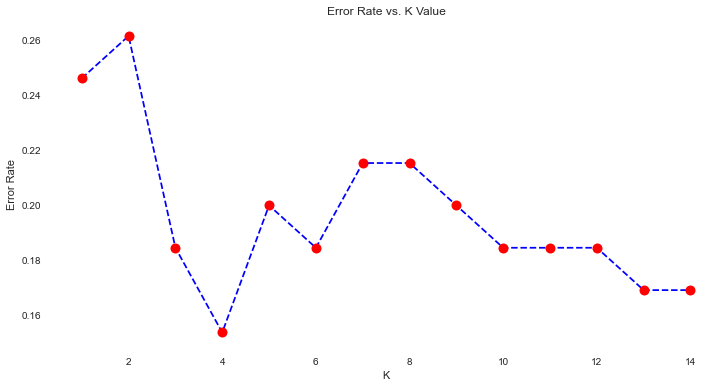

In [79]:
from sklearn.neighbors import KNeighborsClassifier
#Elbow method to find optimal no of neighbors
error_rate = []
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

In [80]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        23
           1       0.88      0.88      0.88        42

    accuracy                           0.85        65
   macro avg       0.83      0.83      0.83        65
weighted avg       0.85      0.85      0.85        65



## Support Vector Machine

In [81]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.88      0.61      0.72        23
           1       0.82      0.95      0.88        42

    accuracy                           0.83        65
   macro avg       0.85      0.78      0.80        65
weighted avg       0.84      0.83      0.82        65



## Prediction of Salary (Regression Analysis)

In [32]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### Data Preprocessing

In [141]:
#dropping NaNs (in Salary)
data_reg.dropna(inplace=True)
#dropping Status = "Placed" column
data_reg.drop("status", axis=1, inplace=True)

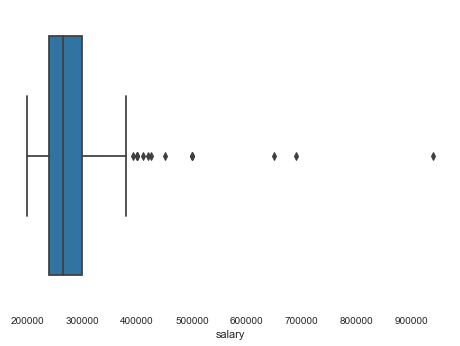

In [142]:
sns.boxplot(data_reg.salary)

It is clear that very few students have salary greater than 400,000 (hence outliers)

In [143]:
# Removing outliers
data_reg = data_reg[data_reg.salary<400000]

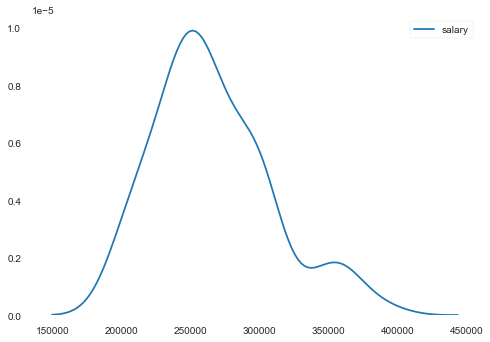

In [144]:
#PDF of Salary without outliers. Still skewed though
sns.kdeplot(data_reg.salary)
plt.show()

In [145]:
data_reg.shape

(134, 11)

In [146]:
dummies = pd.get_dummies(data_reg[['gender','hsc_s','degree_t','workex','specialisation']],drop_first=True)
data_dummies = pd.concat([data_reg,dummies],axis=1)
data_dummies.drop(['gender','hsc_s','degree_t','workex','specialisation'],axis=1,inplace=True)

In [147]:
#Seperating Depencent and Independent Vaiiables
y = data_dummies["salary"] #Dependent Variable
X = data_dummies.drop("salary", axis=1)

In [148]:
#Scalizing between 0-1 (Normalization)
X[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']] = MinMaxScaler().fit_transform(X[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']])

## ML models

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=True)

In [150]:
linear = LinearRegression()
linear.fit(X_train,y_train)
linear_pred = linear.predict(X_test)

from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)

from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(max_depth= 90,
 max_features=2,
 min_samples_leaf=4,
 min_samples_split=10,
 n_estimators= 100)
rfreg.fit(X_train,y_train)
rf_pred  = rfreg.predict(X_test)

from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)

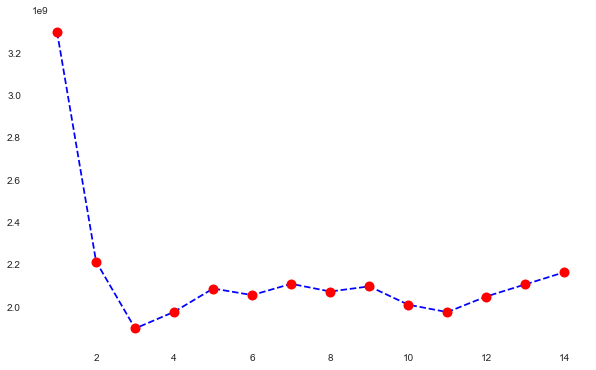

In [151]:
from sklearn.neighbors import KNeighborsRegressor
#elbow-method
error_rate=[]
for i in range(1,15):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(mean_squared_error(y_test,pred_i))
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10);

In [152]:
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

### Evaluating predictions

In [154]:
methods = ['Linear Regression','K-Nearest Neighbors','Decision Tree',
           'Random Forest','Support Vector Machine']
methods_pred = [linear_pred,knn_pred,dtree_pred,rf_pred,svm_pred]
results = pd.DataFrame(columns=['Mean Absolute error','Mean Squared Error','R2-score'],index=methods)
for n,item in list(enumerate(methods_pred)):
    results.loc[methods[n]]=[mean_absolute_error(y_test,item).round(3),mean_squared_error(y_test,item).round(3),
                             r2_score(y_test,item).round(3)]
results

,Mean Absolute error,Mean Squared Error,R2-score
Linear Regression,34648.4,1.92901e+09,0.001
K-Nearest Neighbors,36908.5,1.97716e+09,-0.024
Decision Tree,56756.1,4.86227e+09,-1.519
Random Forest,36043.4,2.12955e+09,-0.103
Support Vector Machine,37340.4,2.43259e+09,-0.26


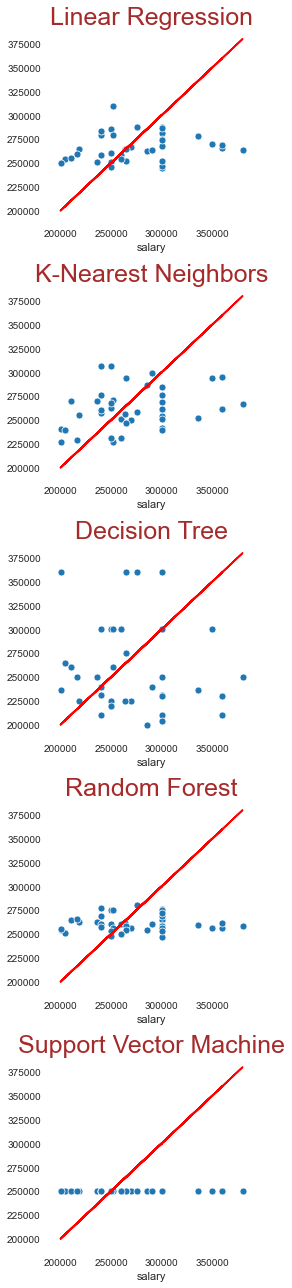

In [156]:
fig,axes=plt.subplots(5,1,figsize=(4,18))
for n in range(5):
    sns.scatterplot(y_test,methods_pred[n],ax=axes[n])
    axes[n].plot(y_test,y_test,c='r')
    axes[n].set_title(methods[n],fontdict={'fontsize':25,'color':'brown'})
plt.tight_layout()

## Conclusion:
* None of our prediction algorithm worked well as R-squared is very low. It happened may be because our data is indufficient.